<a href="https://colab.research.google.com/github/kishoresmeda/EIP_internship_work/blob/master/3rd%20Assignment/Training_a_Cifar10_with_Depthwise_separable_CONV_under_90k_params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras import regularizers
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


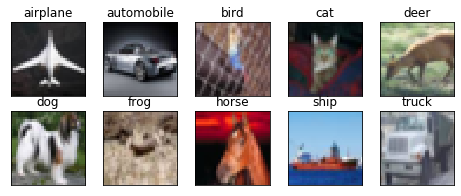

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [32]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [33]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_69 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 12s 30ms/step - loss: 1.8458 - acc: 0.2964 - val_loss: 1.4456 - val_acc: 0.4600
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.3771 - acc: 0.4983 - val_loss: 1.1682 - val_acc: 0.5864
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.1602 - acc: 0.5849 - val_loss: 0.9837 - val_acc: 0.6469
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 1.0372 - acc: 0.6339 - val_loss: 0.9137 - val_acc: 0.6789
Epoch 5/50
390/390 [==============================] - 8s 21ms/step - loss: 0.9485 - acc: 0.6698 - val_loss: 0.9236 - val_acc: 0.6794
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8552 - acc: 0.7040 - val_loss: 0.8140 - val_acc: 0.7187
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7985 - acc: 0.7225 - val_loss: 0.7371 - val_acc: 0.7459
Epoch 8/50
390/390 [==============================] - 8s 20ms/step -

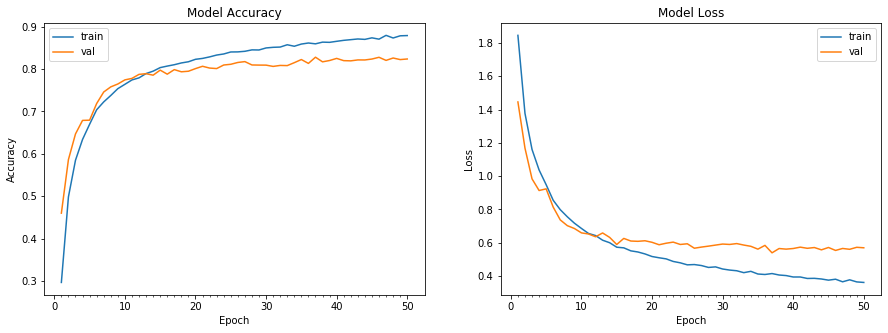

Accuracy on test data is: 82.38


In [34]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [20]:
# Define the dep_sep_model - # Output size, Receptive field
dep_sep_model = Sequential()
dep_sep_model.add(SeparableConv2D(32, (3, 3), border_mode='same', input_shape=(32, 32, 3),activation = 'relu')) # 30, 3
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(SeparableConv2D(32, (3, 3),activation = 'relu')) # 28, 5
dep_sep_model.add(MaxPooling2D(pool_size=(2, 2))) # 14, 5
dep_sep_model.add(Dropout(0.25))

dep_sep_model.add(SeparableConv2D(48, 3, 3, border_mode='same',activation = 'relu')) # 12, 7
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(Dropout(0.1))

dep_sep_model.add(SeparableConv2D(64,(1,1),activation = 'relu')) # 10, 9
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(Dropout(0.1))

dep_sep_model.add(SeparableConv2D(96,(3,3), border_mode='same',activation = 'relu'))
dep_sep_model.add(MaxPooling2D(pool_size=(2, 2)))
dep_sep_model.add(Dropout(0.25))

dep_sep_model.add(SeparableConv2D(192,(3,3),activation = 'relu', border_mode='same'))
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(Dropout(0.1))

dep_sep_model.add(SeparableConv2D(128,(1,1),activation = 'relu', border_mode='same'))
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(Dropout(0.1))

dep_sep_model.add(SeparableConv2D(192, (3, 3),activation = 'relu'))
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(Dropout(0.1))

dep_sep_model.add(SeparableConv2D(10,(1,1),activation = 'relu'))
dep_sep_model.add(BatchNormalization())
dep_sep_model.add(GlobalAveragePooling2D())
dep_sep_model.add(Activation('softmax'))

# Compile the dep_sep_model
dep_sep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
dep_sep_model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_58 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_59 (Separab (None, 30, 30, 32)        1344      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
separable_conv2d_60 (Separab (None, 15, 15, 48)        1872      
_________________________________________________________________
batch_normalization_47 (Batc (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  app.launch_new_instance()


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 30s 77ms/step - loss: 1.5221 - acc: 0.4615 - val_loss: 1.9293 - val_acc: 0.4591
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 24s 62ms/step - loss: 1.1112 - acc: 0.6141 - val_loss: 1.2022 - val_acc: 0.5935
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 24s 62ms/step - loss: 0.9617 - acc: 0.6666 - val_loss: 1.0757 - val_acc: 0.6296
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 24s 62ms/step - loss: 0.8646 - acc: 0.7021 - val_loss: 0.9152 - val_acc: 0.6856
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 24s 62ms/step - loss: 0.8015 - acc: 0.7245

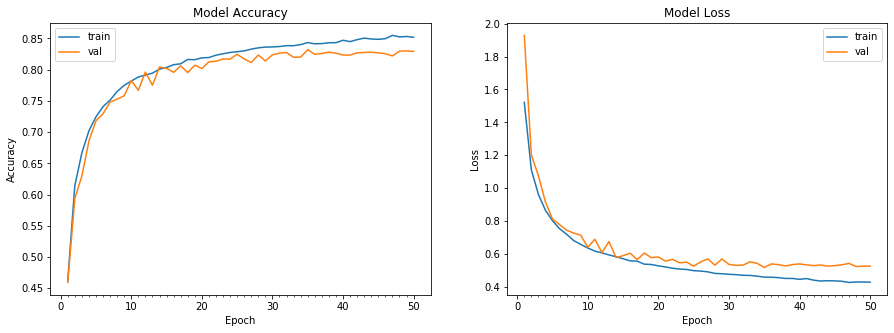

Accuracy on test data is: 82.93


In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the dep_sep_model
start = time.time()
# Train the dep_sep_model
dep_sep_model_info = dep_sep_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("dep_sep_model took %0.2f seconds to train"%(end - start))
# plot dep_sep_model history
plot_model_history(dep_sep_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, dep_sep_model))